# 연구목표

- 년간 음원 출시 데이터 (2017.01 ~ 2018.10)를 이용
- 예시
  - 음반(음원) 제작 현황 파악
  - 이런 뉴스나 보고서 등을 기반으로 분석시작
    - 외곡된 시장 상황이 실제로 존재하는지 분석
  - 기타 데이터와 결합 -> 상관관계 분석 진행 가능함
    - 해당 동기간 차트 순위와 결합
      - 멜론, 한터, ... <= 음원, 음반
      - 방송차트, mbc/sbs/kbs/엠카(공중파급),쇼챔/...(케이블)

# 데이터 수집-(제공)

In [1]:
import numpy as np
import pandas as pd

# ('2.0.2', '2.2.2')
np.__version__, pd.__version__

('2.0.2', '2.2.2')

In [2]:
path = '/content/drive/MyDrive/2. 데이터분석/res/music.xlsx'
# 데이터 로드
df = pd.read_excel(path)
df.shape

(2178, 9)

In [3]:
df.head(2)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12


# 데이터 준비

- 설명 분석
  - 데이터 볼륨, 타입, 컬럼별 특성, 통계요약, ....

In [4]:
# 데이터 기간 확인
df.Year.unique() # 2년간 데이터,

array([2017, 2018])

In [5]:
# 2018년도 데이터는 10월까지 였다 -> 원본데이터 확인 결과
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
# 코드적으로 확인한다면? -> 집계 -> 그룹의 경우의 수를 모두 확인 가능 -> 2017.01월 ~ 2018.10월까지
df.groupby(['Year', 'Month']).size() # 개수

# 월별 제작한 음반수 -> 100개 내외 (-> 데이터 누락이 있었을까?, 판단 보류)

Year  Month
2017  1         94
      2         98
      3         99
      4        100
      5        100
      6        100
      7        100
      8        100
      9         99
      10        99
      11       100
      12        97
2018  1         99
      2         99
      3        100
      4        100
      5         99
      6         99
      7         99
      8         99
      9         99
      10        99
dtype: int64

In [7]:
# 타입 확인
df.dtypes

,0
Year,int64
Month,int64
Album Title,object
Artist Name,object
Genre,object
Date,object
Distribution,object
Rating,float64
Music Count,int64


- 적절하지 않는 타입, 필요한 타입 변경 진행

In [8]:
df.head(1)
# Date 컬럼의 타입이 문자열, 실제는 datetime64로 처리 => 월간, 일간, 년간 등 집계시 유리

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2


In [9]:
# 실습 Date 컬럼의 타입을 datetime64로 변경 처리
# df['Date'] = pd.to_datetime(df['Date'])
# df.dtypes
df.Date = df.Date.astype('datetime64[ns]')
df.dtypes

,0
Year,int64
Month,int64
Album Title,object
Artist Name,object
Genre,object
Date,datetime64[ns]
Distribution,object
Rating,float64
Music Count,int64


- 문자열 데이터 검토
  - 제작사 확인

In [10]:
# 제작사 컬럼의 고유값 출력
df.Distribution.unique()

# 데이터 정제 과정 필요(클리닝 작업) -> 데이터를 하나씩 체크, replace() 대체처리
# '로엔 엔터테인먼트', '로엔엔터테인먼트' : '로엔엔터테인먼트' 하나로 표기
# '소니뮤직', 'Sony Music' : '소니뮤직' 로 표기
# 'Mirrorball Music', '(주)미러볼뮤직' : '(주)미러볼뮤직' 로 표기
# '(주)벅스', '(주)엔에이치엔벅스' : '(주)엔에이치엔벅스' 로 표기
# '㈜인터파크' => '(주)인터파크'
# 'Universal', '유니버설뮤직' : '유니버설뮤직' 로 표기
# '(주)지니뮤직', '지니뮤직' : '(주)지니뮤직' 로 표기
# '퍼플파인 엔터테인먼트', '퍼플파인엔터테인먼트' : '퍼플파인엔터테인먼트' 로 표기
# 'Warner(Korea)', '워너뮤직코리아' : '워너뮤직코리아' 로 표기

# 실습
# 데이터를 하나씩체크 -> apply, str, ...
'''
df['Distribution'] = df['Distribution'].replace({
    '로엔 엔터테인먼트': '로엔엔터테인먼트',
    'Sony Music': '소니뮤직',
    'Mirrorball Music': '(주)미러볼뮤직',
    '(주)벅스': '(주)엔에이치엔벅스',
    '퍼플파인 엔터테인먼트': '퍼플파인엔터테인먼트',
    '㈜인터파크' => '(주)인터파크',
    'Universal': '유니버설뮤직',
    '지니뮤직': '(주)지니뮤직',
    'Warner(Korea)' : '워너뮤직코리아',
})
'''
def clean_distribution(x):
  # '로엔 엔터테인먼트', '로엔엔터테인먼트' : '로엔엔터테인먼트' 하나로 표기
  x = x.replace('로엔 엔터테인먼트', '로엔엔터테인먼트')
  # '소니뮤직', 'Sony Music' : '소니뮤직' 로 표기
  x = x.replace('소니뮤직', '소니뮤직')
  # 'Mirrorball Music', '(주)미러볼뮤직' : '(주)미러볼뮤직' 로 표기
  x = x.replace('Mirrorball Music', '(주)미러볼뮤직')
  # '(주)벅스', '(주)엔에이치엔벅스' : '(주)엔에이치엔벅스' 로 표기
  x = x.replace('(주)벅스', '(주)엔에이치엔벅스')
  # '㈜인터파크' => '(주)인터파크'
  x = x.replace('㈜인터파크', '(주)인터파크')
  # 'Universal', '유니버설뮤직' : '유니버설뮤직' 로 표기
  x = x.replace('Universal', '유니버설뮤직')
  # '(주)지니뮤직', '지니뮤직' : '(주)지니뮤직' 로 표기
  x = x.replace('(주)지니뮤직', '(주)지니뮤직')
  # '퍼플파인 엔터테인먼트', '퍼플파인엔터테인먼트' : '퍼플파인엔터테인먼트' 로 표기
  x = x.replace('퍼플파인 엔터테인먼트', '퍼플파인엔터테인먼트')
  # 'Warner(Korea)', '워너뮤직코리아' : '워너뮤직코리아' 로 표기
  # x = x.replace('Warner(Korea)', '워너뮤직코리아')
  return x

# 시리즈가 반환
df.Distribution = df.Distribution.apply( clean_distribution )
# 시리즈의 값 카운트 체크
# (주)(주)지니뮤직 수정, 퍼플파인 엔터테인먼트 조정 필요
df.Distribution.value_counts()

# 지니뮤직, 로엔, 아이리버 3개 회사가 80%이상(계산하지는 않음) 제작을 점유하는것으로 보임

,count
Distribution,
(주)지니뮤직,768
로엔엔터테인먼트,582
(주)아이리버,453
(주)엔에이치엔벅스,79
워너뮤직코리아,61
유니버설뮤직,56
YG PLUS,46
소니뮤직,39
(주)인터파크,18


In [11]:
df.head(1)

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017-01-25,로엔엔터테인먼트,8.6,2


# 데이터 분석

In [12]:
# 실습
# 집계, 피벗 고려
# 제작사 기준(인덱스), 각 음반의 Rating은 평균값, Distribution은 개수, Music Count 합산으로 표현한 df 구성
df.pivot_table(
    index  =['Distribution'],
    values =['Rating', 'Music Count'],
    aggfunc=[np.mean, len, np.sum])

# 3개 지표만 원하는데, 6개가 나옴
# 검토사항
# (주)아이리버가 음원수 더 많음 => 차후 음반대비 음원 개수 단위로 환산해서 비교
# 음반 제작을 1개해서 잘 나오면 그 회사는 음반을 잘만드는 회사인가? => 최소 10개 이상 제작 기준등 기준점 필요

<ipython-input-12-fcd964bfa4ec>:4: FutureWarning: The provided callable <function mean at 0x7f2f6579d300> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(
<ipython-input-12-fcd964bfa4ec>:4: FutureWarning: The provided callable <function sum at 0x7f2f6579c220> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(


mean                   len                sum        
              Music Count    Rating Music Count Rating Music Count  Rating
Distribution                                                              
(주)루미넌트엔터테인먼트    4.750000  7.275000           4      4          19    29.1
(주)뮤직앤뉴          4.769231  8.361538          13     13          62   108.7
(주)미러볼뮤직         5.571429  6.342857          14     14          78    88.8
(주)아이리버         11.306843  8.430243         453    453        5122  3818.9
(주)엔에이치엔벅스       7.797468  8.511392          79     79         616   672.4
(주)인터파크          6.444444  7.783333          18     18         116   140.1
(주)지니뮤직          5.833333  8.063672         768    768        4480  6192.9
Sony Music       1.500000  9.433333           6      6           9    56.6
Warner(Korea)    8.500000  9.600000           2      2          17    19.2
YG PLUS          6.000000  8.369565          46     46         276   385.0
다날 엔터테인먼트        2.000000  7.100000           6      6          12    42.6
로엔엔터테인먼트         5.213058  8.265464         582    582        3034  4810.5
소니뮤직             8.666667  8.300000          39     39         338   323.7
워너뮤직코리아         13.081967  8.493443          61     61         798   518.1
유니버설뮤직          12.714286  8.392857          56     56         712   470.0
지니뮤직             4.437500  8.043750          16     16          71   128.7
퍼플파인엔터테인먼트       3.500000  3.700000          14     14          49    51.8
포크라노스            1.000000  7.900000           1      1           1     7.9

In [13]:
# 실습
# 집계(o), 피벗 고려
# 제작사 기준(인덱스), 각 음반의 Rating은 평균값, Distribution은 개수, Music Count 합산으로 표현한 df 구성
tmp = df.groupby('Distribution').agg({
    # 컬럼:함수
    'Rating': 'mean',
    'Distribution': 'count',
    'Music Count': 'sum'
})
tmp

,Rating,Distribution,Music Count
Distribution,,,
(주)루미넌트엔터테인먼트,7.275000,4,19
(주)뮤직앤뉴,8.361538,13,62
(주)미러볼뮤직,6.342857,14,78
(주)아이리버,8.430243,453,5122
(주)엔에이치엔벅스,8.511392,79,616
(주)인터파크,7.783333,18,116
(주)지니뮤직,8.063672,768,4480
Sony Music,9.433333,6,9
Warner(Korea),9.600000,2,17


In [14]:
# Distribution의 항목의 개수가 10개 미만(<)인 제작사는 배제
tmp.dtypes

,0
Rating,float64
Distribution,int64
Music Count,int64


In [15]:
# 대략 2년간 10개 이상 제작한 회사만 대상으로 분석
tmp = tmp[ tmp.Distribution > 10 ]
tmp

,Rating,Distribution,Music Count
Distribution,,,
(주)뮤직앤뉴,8.361538,13,62
(주)미러볼뮤직,6.342857,14,78
(주)아이리버,8.430243,453,5122
(주)엔에이치엔벅스,8.511392,79,616
(주)인터파크,7.783333,18,116
(주)지니뮤직,8.063672,768,4480
YG PLUS,8.369565,46,276
로엔엔터테인먼트,8.265464,582,3034
소니뮤직,8.300000,39,338


In [16]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Axes: ylabel='Distribution'>

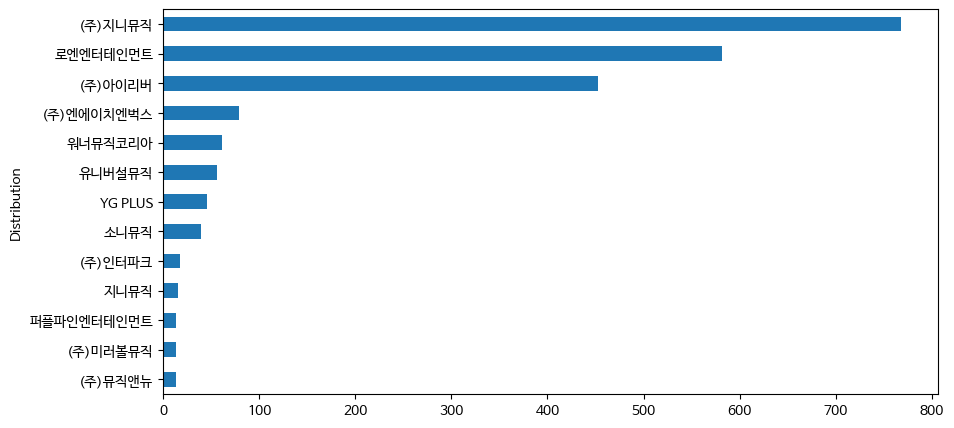

In [21]:
# tmp 데이터를 "기반으로 2년간 제작한 편수로" (내림|오름)정렬하여, 바차트 표현하여 인사이트 도출(해)
tmp.columns = ['평점','음반수','음원수']
al_cnt_df = tmp.sort_values(by='음반수', ascending=True)

# 바차트
plt.figure(figsize=(10, 5))
al_cnt_df['음반수'].plot(kind='barh')#, rot=45)

# 해석
# 지니, 로엔, 아이리버 3개 회사가 2017~2018년에 가장 많은 음반을 유통시켰다
# 나머지 회사들은 100개 이하의 소수로 구성하였다

In [29]:
# 음반 유통사 기준 점유율을 비율로 표현하시오(상대적으로 더 크다, 점유하고 있다, 비중이 높다 표현) => 파이차트
# %로 표기 : (개별 유통사 제작건수)/(전체 유통사 제작건수)로 단위환산 -> 파생변수 생성후 -> 파이차트
al_cnt_df.head(1)

,평점,음반수,음원수
Distribution,,,
(주)뮤직앤뉴,8.361538,13,62


In [36]:
# 파생변수 생성
al_cnt_df['음반제작비율'] = al_cnt_df['음반수'] / al_cnt_df['음반수'].sum()
al_cnt_df

,평점,음반수,음원수,음반제작비율
Distribution,,,,
포크라노스,7.900000,1,1,0.000459
Warner(Korea),9.600000,2,17,0.000918
(주)루미넌트엔터테인먼트,7.275000,4,19,0.001837
다날 엔터테인먼트,7.100000,6,12,0.002755
Sony Music,9.433333,6,9,0.002755
(주)뮤직앤뉴,8.361538,13,62,0.005969
퍼플파인엔터테인먼트,3.700000,14,49,0.006428
(주)미러볼뮤직,6.342857,14,78,0.006428
지니뮤직,8.043750,16,71,0.007346


<Axes: ylabel='음반제작비율'>

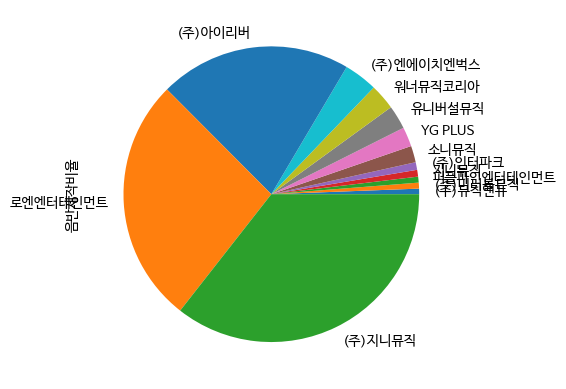

In [32]:
al_cnt_df['음반제작비율'].plot(kind='pie',fontsize=10)
# 3개 회사가 약 82.7% 시장을 점유하고있다 -> 관련기사, 내용 접목 -> 문제점 등등 도출 -> 분석...

# 모델 구축(생략)

# 시스템 통합/산출물/보고서(생략)